Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling1D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [4]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raorajendra","key":"e726749716aede1b13e46490d3335a73"}'}

In [5]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json 

kaggle.json


In [28]:
!kaggle datasets download -d pattnaiksatyajit/skin-cancer -p "/gdrive/MyDrive/data"

100% 785M/786M [00:03<00:00, 268MB/s]
100% 786M/786M [00:03<00:00, 232MB/s]


In [29]:
cd /gdrive/MyDrive/data

/gdrive/MyDrive/data


In [31]:
import shutil
shutil.unpack_archive('skin-cancer.zip', 'Data')

In [33]:
cd Data

/gdrive/MyDrive/data/Data


In [37]:
cd 'Skin cancer ISIC The International Skin Imaging Collaboration'

/gdrive/MyDrive/data/Data/Skin cancer ISIC The International Skin Imaging Collaboration


In [49]:
mv 'Skin cancer ISIC The International Skin Imaging Collaboration' MelonamaDataSet

In [72]:
ls

MelonamaDataSet/


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [73]:
#  Read data path for train and test  

# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("MelonamaDataSet/Train/")
data_dir_test = pathlib.Path('MelonamaDataSet/Test/')

In [74]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [75]:
batch_size = 32
img_height = 180
img_width = 180
image_size=(img_height ,img_width )

Use 80% of the images for training, and 20% for validation.

In [83]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,subset="training",image_size=(img_height,img_width),seed=123,validation_split=0.2)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [84]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,subset="validation",image_size=(img_height,img_width),seed=123,validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [85]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Lets have a look of all nine categories image 

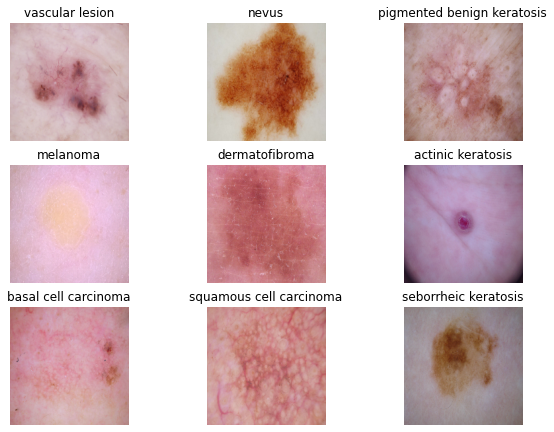

In [ ]:
import matplotlib.pyplot as plt

res =  [False for i in range(9)]
 

### your code goes here, you can use training or validation data to visualize
i=0
plt.figure(figsize=(10, 10))
for img,label in train_ds.take(2):
    #for i in range(9):
    for l in label:
        if res[l]==False:
           res[l]=True 
           ax = plt.subplot(4, 3, i + 1)
           i=i + 1
           
           plt.title(train_ds.class_names[l.numpy()] )
           plt.imshow(img[l].numpy().astype("uint8"))
           plt.axis("off")

    #print(img.shape)
    #print(label) 

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
####: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

#### lets try convaluation layer with 32 ,64, 128 filter .
#### filter size is 3*3 


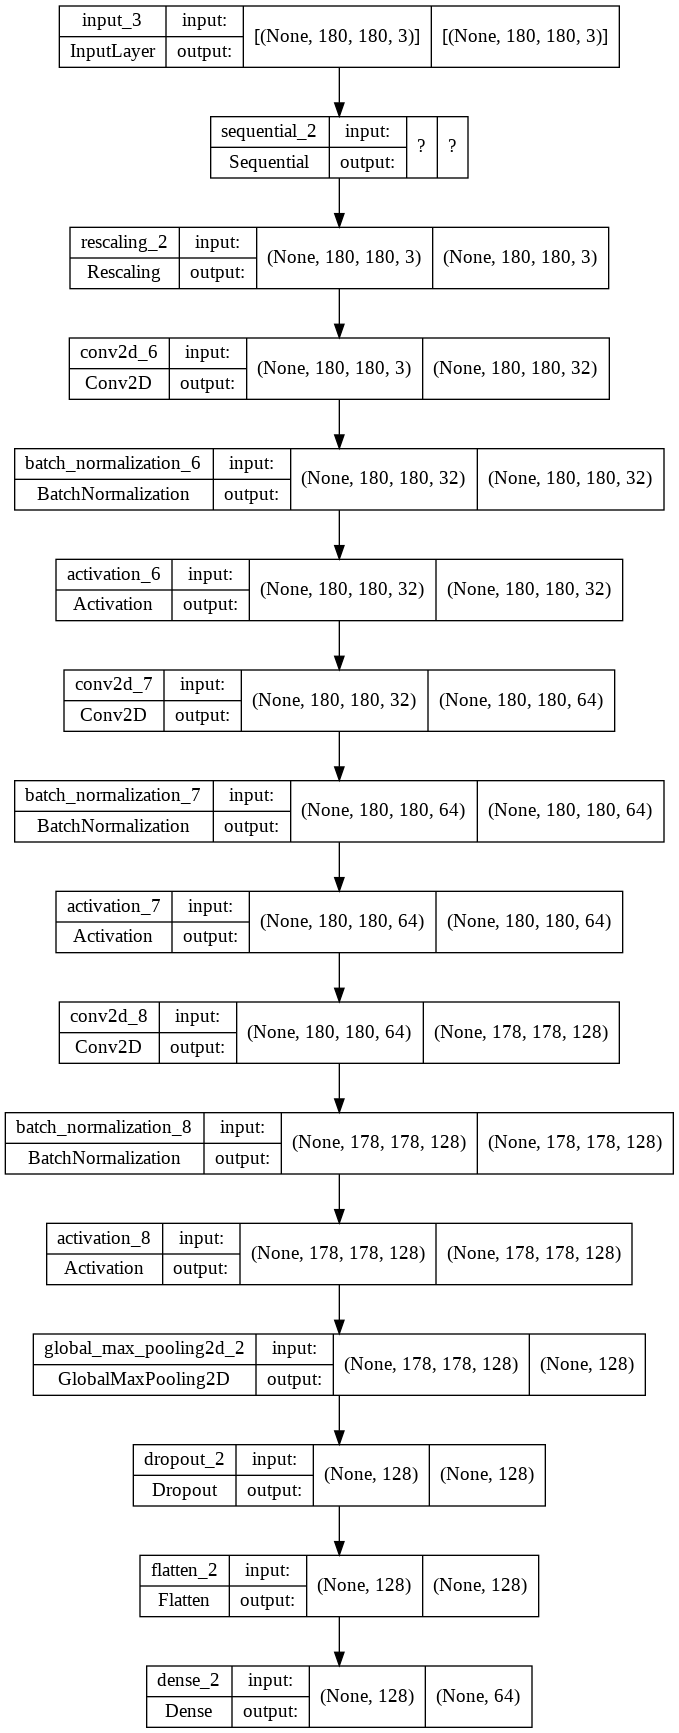

In [ ]:
input_shape=image_size + (3,)
num_classes=9
inputs = keras.Input(shape=input_shape)
x=keras.Sequential()(inputs)
x = layers.Rescaling(1.0 / 255)(x)
   
x = layers.Conv2D(32, 3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)

x = layers.Conv2D(64, 3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)

x = layers.Conv2D(128, 3, strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)



x = layers.GlobalMaxPooling2D()(x)

activation = "softmax"
units = num_classes
x = layers.Dropout(0.1)(x)
x=layers.Flatten()(x)

outputs = layers.Dense(64, activation=activation)(x)

model= keras.Model(inputs, outputs)

keras.utils.plot_model(model, show_shapes=True)


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile( optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#models.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# View the summary of all layers
#models.build()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   multiple                  0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 180, 180, 32)      0         
                                                           

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - ETA: 0s - loss: 2.1497 - accuracy: 0.3023

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 220s 1s/step - loss: 2.1497 - accuracy: 0.3023 - val_loss: 3.3910 - val_accuracy: 0.1054
Epoch 2/20
169/169 [==============================] - 39s 233ms/step - loss: 1.6205 - accuracy: 0.4024 - val_loss: 2.2322 - val_accuracy: 0.2138
Epoch 3/20
169/169 [==============================] - 40s 238ms/step - loss: 1.5078 - accuracy: 0.4347 - val_loss: 1.5871 - val_accuracy: 0.4224
Epoch 4/20
169/169 [==============================] - 40s 237ms/step - loss: 1.4412 - accuracy: 0.4599 - val_loss: 1.3633 - val_accuracy: 0.4796
Epoch 5/20
169/169 [==============================] - 40s 238ms/step - loss: 1.3878 - accuracy: 0.4781 - val_loss: 1.3654 - val_accuracy: 0.4811
Epoch 6/20
169/169 [==============================] - 40s 237ms/step - loss: 1.3353 - accuracy: 0.4920 - val_loss: 1.3003 - val_accuracy: 0.5108
Epoch 7/20
169/169 [==============================] - 40s 237ms/step - loss: 1.3026 - accuracy: 0.5011 - val_loss: 1.2102 - val_accuracy: 0.554

### Visualizing training results

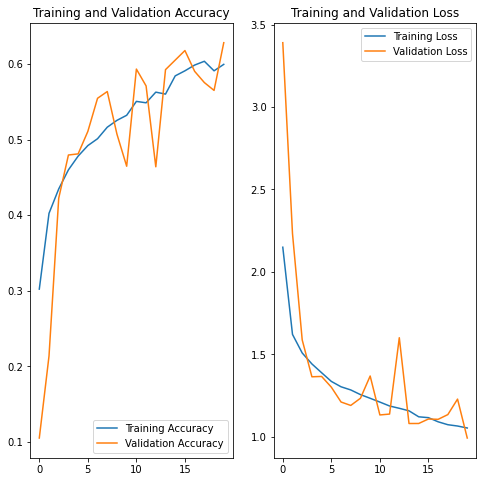

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### lets try with increasing dense layer size with 128 


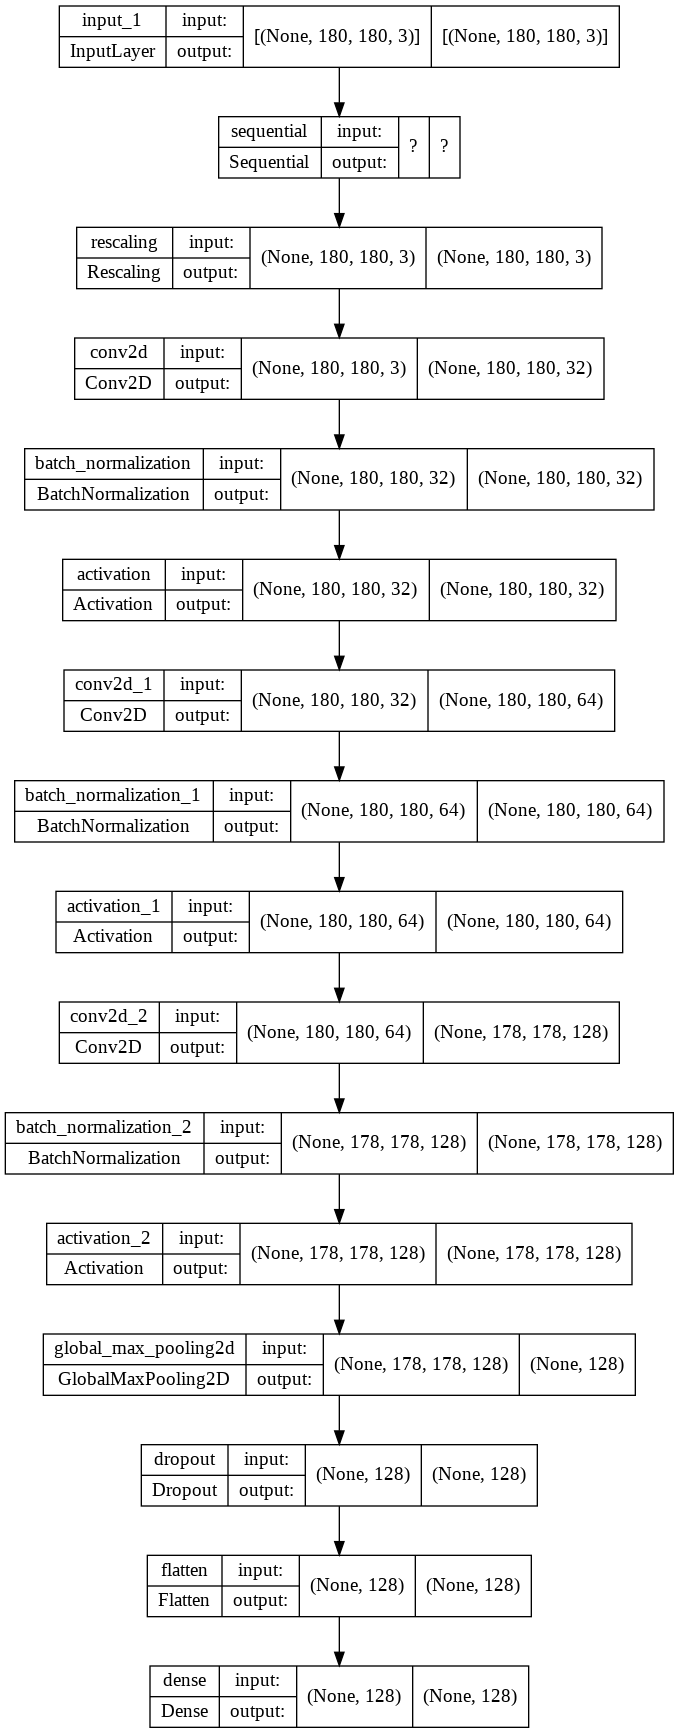

In [ ]:
input_shape=image_size + (3,)
num_classes=9
inputs = keras.Input(shape=input_shape)
x=keras.Sequential()(inputs)
x = layers.Rescaling(1.0 / 255)(x)
   
x = layers.Conv2D(32, 3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)

x = layers.Conv2D(64, 3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)

x = layers.Conv2D(128, 3, strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)



x = layers.GlobalMaxPooling2D()(x)

activation = "softmax"
units = num_classes
x = layers.Dropout(0.1)(x)
x=layers.Flatten()(x)

outputs = layers.Dense(128, activation=activation)(x)

model= keras.Model(inputs, outputs)

keras.utils.plot_model(model, show_shapes=True)


In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile( optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#models.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 187s 928ms/step - loss: 2.8308 - accuracy: 0.2863 - val_loss: 4.4921 - val_accuracy: 0.0761
Epoch 2/20
56/56 [==============================] - 13s 232ms/step - loss: 1.7904 - accuracy: 0.3962 - val_loss: 4.1987 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 13s 234ms/step - loss: 1.5768 - accuracy: 0.4503 - val_loss: 3.7489 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 13s 236ms/step - loss: 1.5044 - accuracy: 0.4676 - val_loss: 3.2307 - val_accuracy: 0.1521
Epoch 5/20
56/56 [==============================] - 13s 239ms/step - loss: 1.4334 - accuracy: 0.4944 - val_loss: 2.8258 - val_accuracy: 0.1767
Epoch 6/20
56/56 [==============================] - 13s 241ms/step - loss: 1.4027 - accuracy: 0.5011 - val_loss: 2.4234 - val_accuracy: 0.1812
Epoch 7/20
56/56 [==============================] - 13s 239ms/step - loss: 1.3581 - accuracy: 0.5195 - val_loss: 2.0886 - val_accuracy: 0.2685
Epoch 8/2

### finding : with increasing dense layers we saw model is overfitting where training set accuracy is 0.60 but validation acuracy is 0.49

###- Lets use image augmentation for images to increase data. 

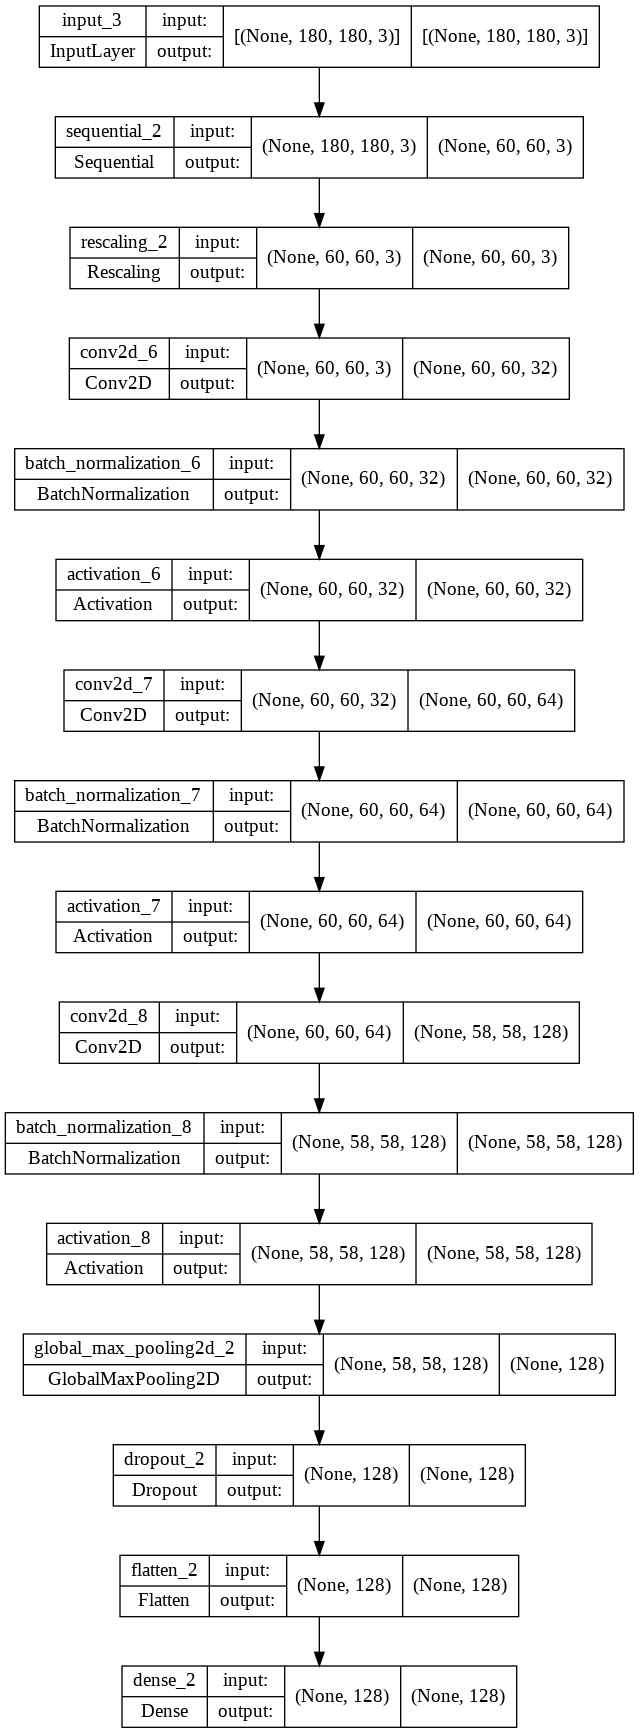

In [ ]:
input_shape=image_size + (3,)
num_classes=9
inputs = keras.Input(shape=input_shape)
x=keras.Sequential([
     layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomCrop(60,60),]
      
)(inputs)

x = layers.Rescaling(1.0 / 255)(x)
   
x = layers.Conv2D(32, 3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)

x = layers.Conv2D(64, 3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)

x = layers.Conv2D(128, 3, strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)



x = layers.GlobalMaxPooling2D()(x)

activation = "softmax"
units = num_classes
x = layers.Dropout(0.1)(x)
x=layers.Flatten()(x)

outputs = layers.Dense(128, activation=activation)(x)

model= keras.Model(inputs, outputs)

keras.utils.plot_model(model, show_shapes=True)


In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile( optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#models.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 4s 42ms/step - loss: 2.7673 - accuracy: 0.2656 - val_loss: 4.6231 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 2s 35ms/step - loss: 1.8379 - accuracy: 0.3694 - val_loss: 4.2969 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 2s 35ms/step - loss: 1.6724 - accuracy: 0.4051 - val_loss: 3.8466 - val_accuracy: 0.1588
Epoch 4/20
56/56 [==============================] - 2s 35ms/step - loss: 1.6403 - accuracy: 0.4213 - val_loss: 3.2407 - val_accuracy: 0.2483
Epoch 5/20
56/56 [==============================] - 2s 35ms/step - loss: 1.5993 - accuracy: 0.4280 - val_loss: 2.7863 - val_accuracy: 0.2170
Epoch 6/20
56/56 [==============================] - 2s 34ms/step - loss: 1.5642 - accuracy: 0.4286 - val_loss: 2.4659 - val_accuracy: 0.2327
Epoch 7/20
56/56 [==============================] - 2s 34ms/step - loss: 1.5394 - accuracy: 0.4570 - val_loss: 1.8947 - val_accuracy: 0.3557
Epoch 8/20
56/56 [======

#### After image augmentation acuracy decreases with 0.49 and validation acuracy is 0.47

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [79]:
## we can read folder by folder and print number of images in each folder

import os
 
for file in os.listdir(data_dir_train):
    d = os.path.join(data_dir_train, file)
    if os.path.isdir(d):
       print(file,'-',len([name for name in os.listdir(d) if os.path.isfile(os.path.join(d, name))]))
       
 

melanoma - 438
actinic keratosis - 114
nevus - 357
basal cell carcinoma - 376
pigmented benign keratosis - 462
seborrheic keratosis - 77
dermatofibroma - 95
squamous cell carcinoma - 181
vascular lesion - 139


#### - 'seborrheic keratosis'  has the least number of samples.
#### - 'pigmented benign keratosis' has highest number of example which is almost 20% of overall samples



#### **Context:** lets use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [80]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [86]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    print(data_dir_train)
    print(str(path_to_training_dataset) + i)
    p = Augmentor.Pipeline(str(path_to_training_dataset) + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

MelonamaDataSet/Train
MelonamaDataSet/Train/actinic keratosis
Initialised with 114 image(s) found.
Output directory set to MelonamaDataSet/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFF29643D50>: 100%|██████████| 500/500 [00:16<00:00, 30.33 Samples/s]


MelonamaDataSet/Train
MelonamaDataSet/Train/basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to MelonamaDataSet/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFF2CB32050>: 100%|██████████| 500/500 [00:15<00:00, 31.31 Samples/s]


MelonamaDataSet/Train
MelonamaDataSet/Train/dermatofibroma
Initialised with 95 image(s) found.
Output directory set to MelonamaDataSet/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFF2CBCA790>: 100%|██████████| 500/500 [00:16<00:00, 30.06 Samples/s]


MelonamaDataSet/Train
MelonamaDataSet/Train/melanoma
Initialised with 438 image(s) found.
Output directory set to MelonamaDataSet/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EFF28DA0FD0>: 100%|██████████| 500/500 [01:24<00:00,  5.89 Samples/s]


MelonamaDataSet/Train
MelonamaDataSet/Train/nevus
Initialised with 357 image(s) found.
Output directory set to MelonamaDataSet/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F00401BDE10>: 100%|██████████| 500/500 [01:09<00:00,  7.24 Samples/s]


MelonamaDataSet/Train
MelonamaDataSet/Train/pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to MelonamaDataSet/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFBD99C890>: 100%|██████████| 500/500 [00:16<00:00, 29.81 Samples/s]


MelonamaDataSet/Train
MelonamaDataSet/Train/seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to MelonamaDataSet/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EFFBD99CED0>: 100%|██████████| 500/500 [00:42<00:00, 11.77 Samples/s]


MelonamaDataSet/Train
MelonamaDataSet/Train/squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to MelonamaDataSet/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFF29656E90>: 100%|██████████| 500/500 [00:16<00:00, 30.01 Samples/s]


MelonamaDataSet/Train
MelonamaDataSet/Train/vascular lesion
Initialised with 139 image(s) found.
Output directory set to MelonamaDataSet/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFBF242F90>: 100%|██████████| 500/500 [00:16<00:00, 29.59 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [87]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [88]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_new)

4500

In [89]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_new)

4500

In [90]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [91]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
df2.head()
len(dataframe_dict_new)

4500

In [92]:
df2['Label'].value_counts()

melanoma                      500
actinic keratosis             500
nevus                         500
basal cell carcinoma          500
pigmented benign keratosis    500
seborrheic keratosis          500
dermatofibroma                500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [93]:
batch_size = 32
img_height = 180
img_width = 180
image_size=(180,180)

#### **Todo:** Create a training dataset

In [94]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [95]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

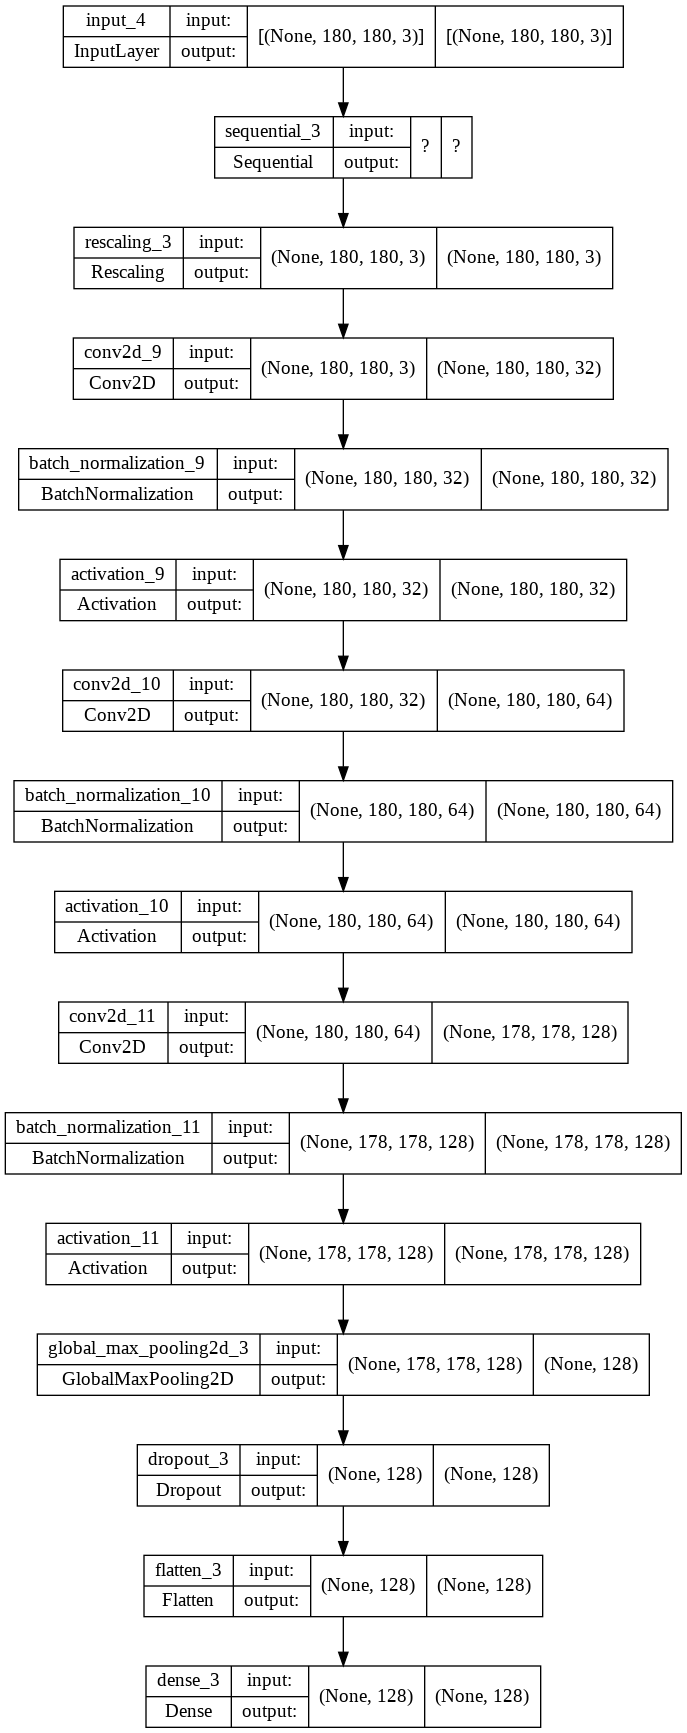

In [ ]:
## your code goes here
input_shape=image_size + (3,)
num_classes=9
inputs = keras.Input(shape=input_shape)
x=keras.Sequential()(inputs)
x = layers.Rescaling(1.0 / 255)(x)
   
x = layers.Conv2D(32, 3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)

x = layers.Conv2D(64, 3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)

x = layers.Conv2D(128, 3, strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)



x = layers.GlobalMaxPooling2D()(x)

activation = "softmax"
units = num_classes
x = layers.Dropout(0.2)(x)
x=layers.Flatten()(x)

outputs = layers.Dense(128, activation=activation)(x)

model= keras.Model(inputs, outputs)

keras.utils.plot_model(model, show_shapes=True)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile( optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#models.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 48s 271ms/step - loss: 2.2198 - accuracy: 0.3010 - val_loss: 3.7210 - val_accuracy: 0.1633
Epoch 2/30
169/169 [==============================] - 47s 270ms/step - loss: 1.6634 - accuracy: 0.3830 - val_loss: 2.5058 - val_accuracy: 0.2339
Epoch 3/30
169/169 [==============================] - 46s 266ms/step - loss: 1.5451 - accuracy: 0.4063 - val_loss: 1.5508 - val_accuracy: 0.4180
Epoch 4/30
169/169 [==============================] - 46s 266ms/step - loss: 1.5136 - accuracy: 0.4334 - val_loss: 1.4900 - val_accuracy: 0.4358
Epoch 5/30
169/169 [==============================] - 47s 271ms/step - loss: 1.4657 - accuracy: 0.4445 - val_loss: 1.8353 - val_accuracy: 0.3608
Epoch 6/30
169/169 [==============================] - 48s 275ms/step - loss: 1.4320 - accuracy: 0.4612 - val_loss: 1.5508 - val_accuracy: 0.4284
Epoch 7/30
169/169 [==============================] - 46s 266ms/step - loss: 1.4138 - accuracy: 0.4607 - val_loss: 1.5858 - val_accuracy: 0.4

#### **Todo:**  Visualize the model results

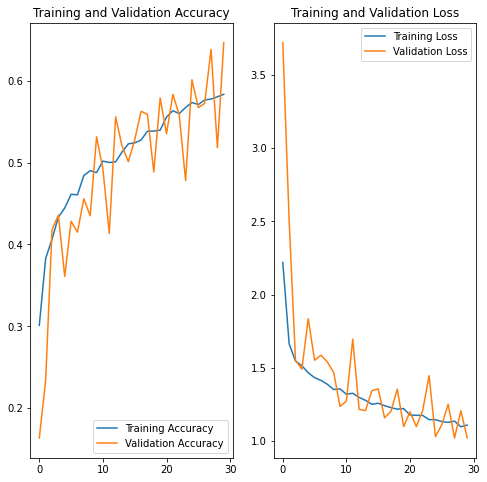

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



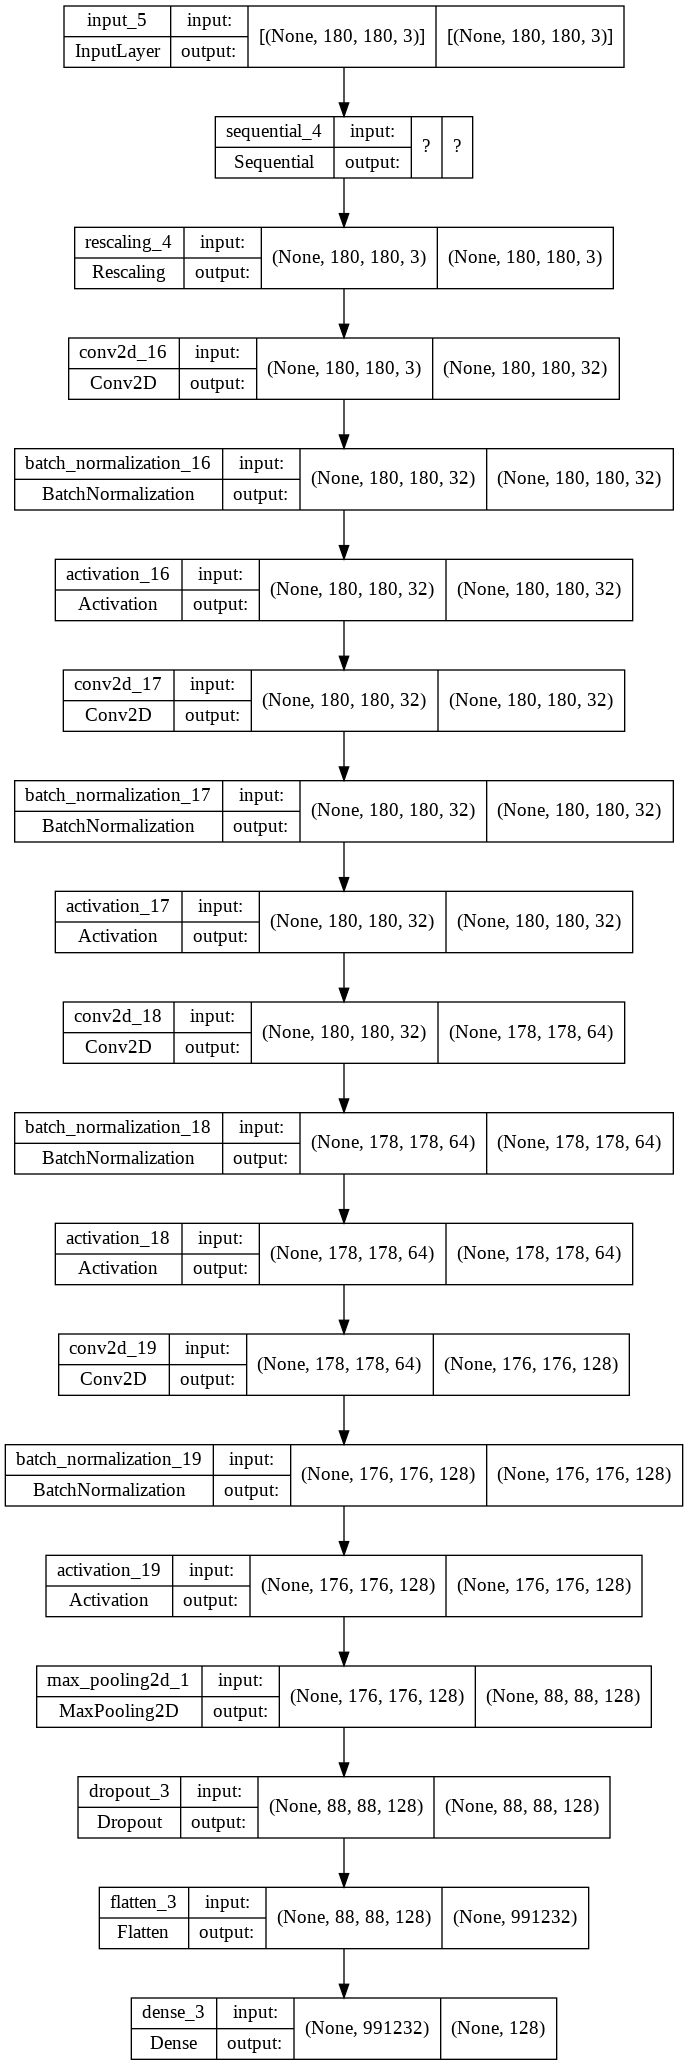

In [101]:
## your code goes here
input_shape=image_size + (3,)
num_classes=9
inputs = keras.Input(shape=input_shape)
x=keras.Sequential()(inputs)
x = layers.Rescaling(1.0 / 255)(x)
   
x = layers.Conv2D(32, 3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)

x = layers.Conv2D(32, 3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)

x = layers.Conv2D(64, 3, strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)


x = layers.Conv2D(128, 3, strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)



x = layers.MaxPooling2D(pool_size=(2, 2))(x)

activation = "softmax"
units = num_classes
x = layers.Dropout(0.2)(x)
x=layers.Flatten()(x)

outputs = layers.Dense(128, activation=activation)(x)

model= keras.Model(inputs, outputs)

keras.utils.plot_model(model, show_shapes=True)


In [102]:
## your code goes here
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile( optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#models.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [103]:
epochs = 30
## Your code goes here, use 50 epochs.
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 52s 299ms/step - loss: 19.1833 - accuracy: 0.3181 - val_loss: 2.4141 - val_accuracy: 0.1782
Epoch 2/30
169/169 [==============================] - 53s 309ms/step - loss: 1.3311 - accuracy: 0.5334 - val_loss: 1.6082 - val_accuracy: 0.4284
Epoch 3/30
169/169 [==============================] - 52s 306ms/step - loss: 1.0519 - accuracy: 0.6369 - val_loss: 1.1847 - val_accuracy: 0.5999
Epoch 4/30
169/169 [==============================] - 53s 310ms/step - loss: 0.8891 - accuracy: 0.6957 - val_loss: 1.0495 - val_accuracy: 0.6407
Epoch 5/30
169/169 [==============================] - 53s 308ms/step - loss: 0.7467 - accuracy: 0.7487 - val_loss: 1.1729 - val_accuracy: 0.6295
Epoch 6/30
169/169 [==============================] - 53s 308ms/step - loss: 0.6448 - accuracy: 0.7882 - val_loss: 1.3415 - val_accuracy: 0.5932
Epoch 7/30
169/169 [==============================] - 53s 309ms/step - loss: 0.5175 - accuracy: 0.8262 - val_loss: 0.9403 - val_accuracy: 0.

##### we can see above model is overfitted as training accuracy is .95 but validation acuracy is 0.81 lets increase Dropout weight to 0.35

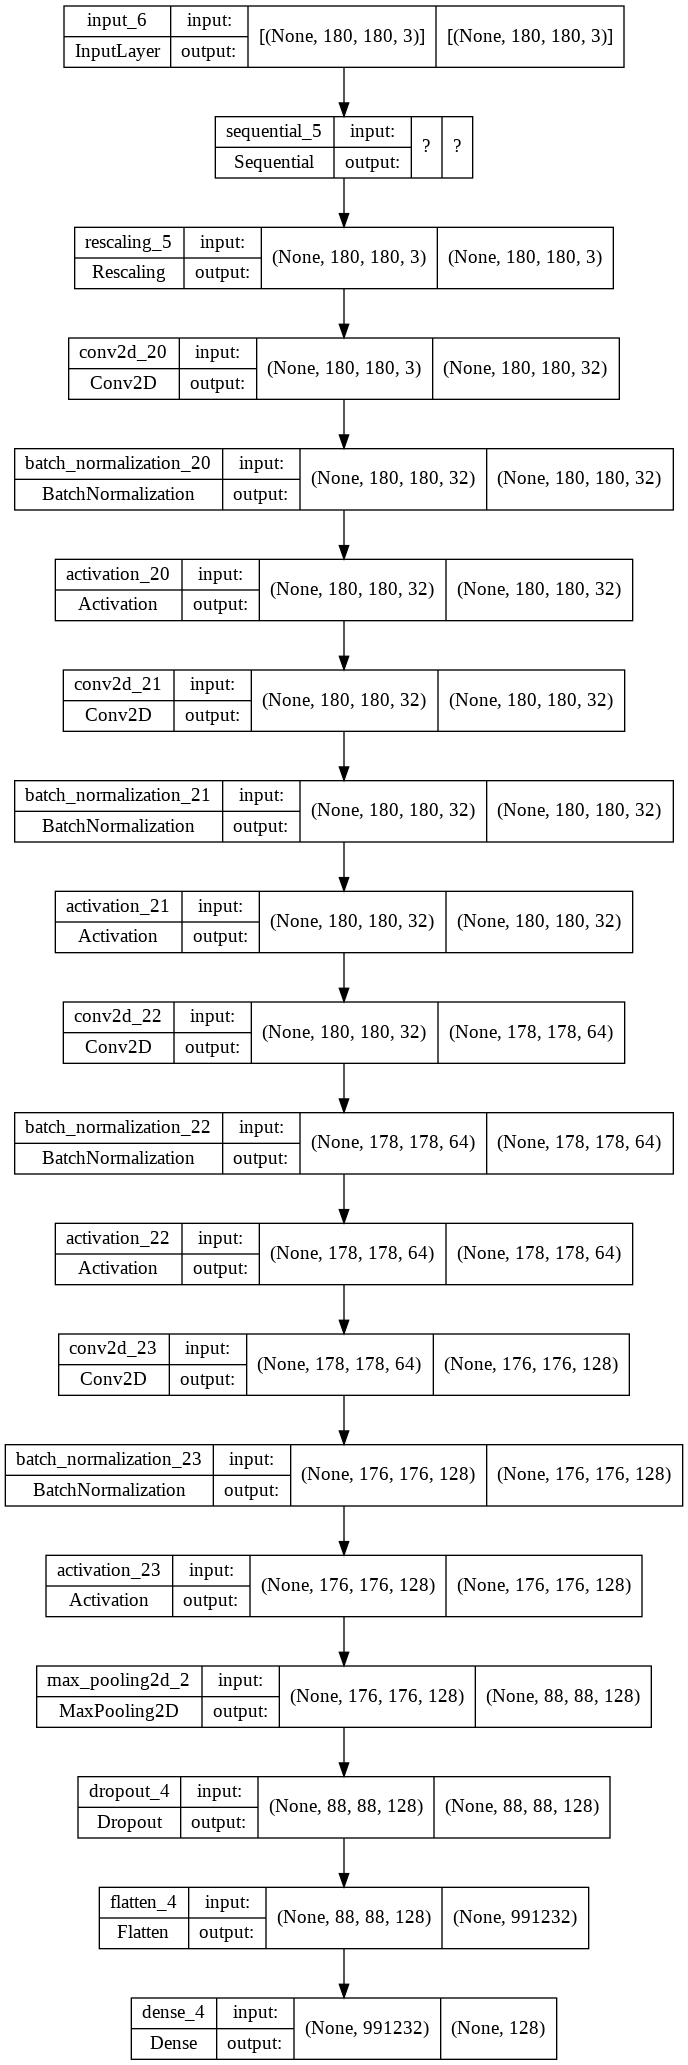

In [104]:
## your code goes here
input_shape=image_size + (3,)
num_classes=9
inputs = keras.Input(shape=input_shape)
x=keras.Sequential()(inputs)
x = layers.Rescaling(1.0 / 255)(x)
   
x = layers.Conv2D(32, 3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)

x = layers.Conv2D(32, 3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)

x = layers.Conv2D(64, 3, strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)


x = layers.Conv2D(128, 3, strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
#x = layers.GlobalMaxPooling2D()(x)



x = layers.MaxPooling2D(pool_size=(2, 2))(x)

activation = "softmax"
units = num_classes
x = layers.Dropout(0.35)(x)
x=layers.Flatten()(x)

outputs = layers.Dense(128, activation=activation)(x)

model= keras.Model(inputs, outputs)

keras.utils.plot_model(model, show_shapes=True)


In [105]:
model.compile( optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#models.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [106]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 54s 304ms/step - loss: 16.7069 - accuracy: 0.2956 - val_loss: 2.2740 - val_accuracy: 0.1997
Epoch 2/30
169/169 [==============================] - 53s 307ms/step - loss: 1.4440 - accuracy: 0.4868 - val_loss: 1.5218 - val_accuracy: 0.4759
Epoch 3/30
169/169 [==============================] - 53s 306ms/step - loss: 1.2174 - accuracy: 0.5855 - val_loss: 1.4622 - val_accuracy: 0.4870
Epoch 4/30
169/169 [==============================] - 53s 308ms/step - loss: 1.0354 - accuracy: 0.6458 - val_loss: 1.4430 - val_accuracy: 0.5442
Epoch 5/30
169/169 [==============================] - 53s 307ms/step - loss: 0.8830 - accuracy: 0.7083 - val_loss: 1.3198 - val_accuracy: 0.5612
Epoch 6/30
169/169 [==============================] - 53s 308ms/step - loss: 0.7602 - accuracy: 0.7444 - val_loss: 1.3737 - val_accuracy: 0.5857
Epoch 7/30
169/169 [==============================] - 53s 309ms/step - loss: 0.6839 - accuracy: 0.7758 - val_loss: 1.1823 - val_accuracy: 0.

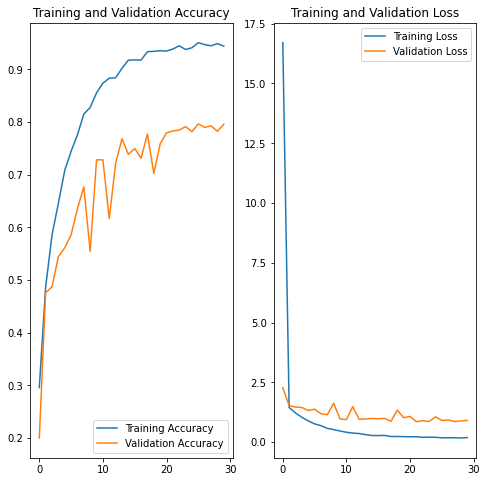

In [116]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observation- 
we have trained model with training accuracy of 0.94 and val_accuracy of 0.79, we have overfitted model , we can train model with reducing filters and increasing dropout weight .